![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)

<img src="https://user-images.githubusercontent.com/7065401/56043485-b7beb000-5d13-11e9-8fd9-cf15ee482532.png"
    style="width:350px; float: right; margin: 0 40px 40px 40px;"></img>

## StackOverflow Developer Survey 2018
# **Analyzing Bootcamp respondants**

Each year, <a href="https://stackoverflow.com/" target="_blank">StackOverflow</a> asks the developer community about everything from their favorite technologies to their job preferences, then they publish Survey results of over 100,000 developers.

We'll analyze **bootcamp respondants** and its relationships with non-bootcamp respondants.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
!pip install geopandas descartes mapclassify

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

%matplotlib inline

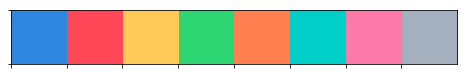

In [3]:
flatui = ["#2e86de", "#ff4757", "#feca57", "#2ed573", "#ff7f50", "#00cec9", "#fd79a8", "#a4b0be"]
flatui_palette = sns.color_palette(flatui)
sns.palplot(flatui_palette)
sns.set_palette(flatui_palette)

sns.set_style("darkgrid", {
    'axes.edgecolor': '#2b2b2b',
    'axes.facecolor': '#2b2b2b',
    'axes.labelcolor': '#919191',
    'figure.facecolor': '#2b2b2b',
    'grid.color': '#545454',
    'patch.edgecolor': '#2b2b2b',
    'text.color': '#bababa',
    'xtick.color': '#bababa',
    'ytick.color': '#bababa',

})

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Import data

In [ ]:
!mkdir data && cd data/ && wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=19AUNctJbJ2CFWHmxZIULb2qOph8iNpk3' -O survey.zip
!cd data/ && unzip survey.zip

In [4]:
df = pd.read_csv('data/survey_results_public.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [6]:
df.head(1)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own company,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,10.000,7.000,8.000,1.000,2.000,5.000,3.000,4.000,9.000,6.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.000,1.000,4.000,2.000,5.000,5.000,6.000,7.000,2.000,1.000,4.000,3.000,My job status or other personal status changed,NaN,NaN,Monthly,nan,KES,Slack,One to three months,"Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon","The official documentation and/or standards for the technology;A book or e-book from O’Reilly, Apress, or a similar publisher;Questions & answers on Stack Overflow;Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,"Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)","Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)",AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researched it (without clicking on the ad);Stopped going to a website because of their advertising,1.000,5.000,4.000,7.000,2.000,6.000,3.000,"Artificial intelligence surpassing human intelligence (""the singularity"")",Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than worried about the dangers.,No,"Yes, and publicly",Upper mana

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Country analysis

The first thing we're going to do is analyze where are the respondents from. To do that we'll use the `GeoPandas` library.

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns = ['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est', 'geometry']

In [8]:
respondents = df.groupby('Country')['Country'].count()

world = world.join(respondents, on='Country', rsuffix='respondents')
world['Countryrespondents'].fillna(value=0, inplace=True)

world['Countryrespondents'] = world['Countryrespondents'] / world['Countryrespondents'].sum() * 100

Text(0.5,1,'Respondents per Country (%)')

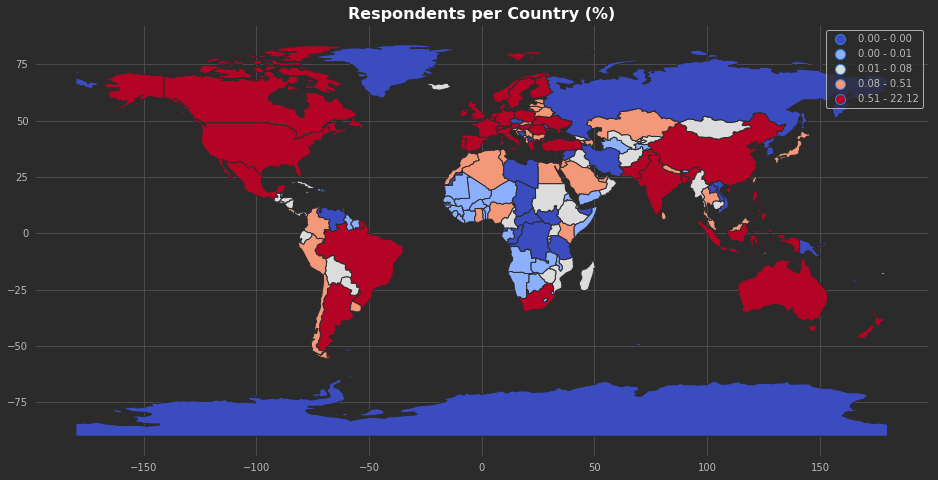

In [9]:
world.plot(column='Countryrespondents',
           cmap='coolwarm',
           scheme='quantiles',
           legend=True,
           figsize=(16,8))

plt.title("Respondents per Country (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Bootcamp analysis

We'll center our analysis on people who attended to Bootcamps.

Just ~7% of respondents attended to a Bootcamp.

In [10]:
df['EducationTypes'].str.split(';', expand=True).stack().unique()

array(['Taught yourself a new language, framework, or tool without taking a formal course',
       'Participated in a hackathon',
       'Contributed to open source software',
       'Completed an industry certification program (e.g. MCPD)',
       'Taken a part-time in-person course in programming or software development',
       'Received on-the-job training in software development',
       'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)',
       'Taken an online course in programming or software development (e.g. a MOOC)',
       'Participated in a full-time developer training program or bootcamp'],
      dtype=object)

In [11]:
df['Took Bootcamp?'] = df['EducationTypes'].str.contains('Participated in a full-time developer training program or bootcamp').fillna(False)

In [12]:
just_bootcamp = df.loc[df['Took Bootcamp?']]

In [13]:
df.shape

(98855, 130)

In [14]:
df.loc[df['Took Bootcamp?']].shape

(6987, 130)

In [15]:
df.loc[~df['Took Bootcamp?']].shape

(91868, 130)

In [16]:
91868/98855

0.9293207222699914

In [17]:
bootcamp = pd.Series(df.loc[df['Took Bootcamp?'], 'Took Bootcamp?'].count() / df.shape[0] * 100)
no_bootcamp = pd.Series(df.loc[~df['Took Bootcamp?'], 'Took Bootcamp?'].count() / df.shape[0] * 100)

bootcamp_df = pd.concat([bootcamp, no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
bootcamp_df

,Took Bootcamp,No took Bootcamp
0,7.068,92.932


Text(0.5,1,'Respondents that attended to a Bootcamp (%)')

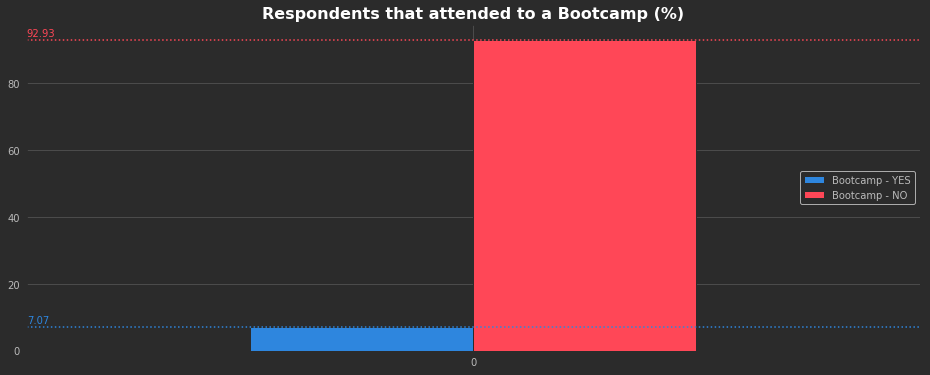

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))

bootcamp_df.plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])

plt.axhline(bootcamp_df['Took Bootcamp'][0], linestyle=':', color=flatui_palette[0])
plt.text(-0.5, bootcamp_df['Took Bootcamp'][0]+1, round(bootcamp_df['Took Bootcamp'][0], 2), color=flatui_palette[0])

plt.axhline(bootcamp_df['No took Bootcamp'][0], linestyle=':', color=flatui_palette[1])
plt.text(-0.5, bootcamp_df['No took Bootcamp'][0]+1, round(bootcamp_df['No took Bootcamp'][0], 2), color=flatui_palette[1])

plt.xticks(rotation=0)
plt.title("Respondents that attended to a Bootcamp (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Time after Bootcamp to get a Developer job

We'll get the percentages or the time respondents need to get a Developer job after attending to a bootcamp.

We see that ~45% already had a full-time work; **~46% get a new job within a year**; and just the ~9% haven't gotten a developer job.

In [19]:
arr = just_bootcamp['TimeAfterBootcamp'].dropna().value_counts()

In [20]:
arr

I already had a full-time job as a developer when I began the program    3025
Immediately after graduating                                             1085
One to three months                                                       668
I haven’t gotten a developer job                                          581
Less than a month                                                         496
Four to six months                                                        347
Six months to a year                                                      239
Longer than a year                                                        211
Name: TimeAfterBootcamp, dtype: int64

In [21]:
arr = arr.drop('I already had a full-time job as a developer when I began the program')

In [22]:
arr.loc[arr.index != 'I haven’t gotten a developer job'].sum()

3046

In [23]:
arr.loc[arr.index != 'I haven’t gotten a developer job'].sum() / arr.sum()

0.8398125172318721

In [24]:
time_index = ['I already had a full-time job as a developer when I began the program',
              'Immediately after graduating', 'Less than a month',
              'One to three months', 'Four to six months',
              'Six months to a year', 'Longer than a year', 'I haven’t gotten a developer job']

time_index_short = ['I already had a full-time', 'Immediately after graduating',
                    '<1 month', '1-3 months', '4-6 months', '6-12 months', '>12 months',
                    'I haven’t gotten a developer job']

time_after_bootcamp = just_bootcamp['TimeAfterBootcamp'].dropna().value_counts() / just_bootcamp['TimeAfterBootcamp'].dropna().shape[0] * 100
time_after_bootcamp

I already had a full-time job as a developer when I began the program   45.475
Immediately after graduating                                            16.311
One to three months                                                     10.042
I haven’t gotten a developer job                                         8.734
Less than a month                                                        7.456
Four to six months                                                       5.216
Six months to a year                                                     3.593
Longer than a year                                                       3.172
Name: TimeAfterBootcamp, dtype: float64

Text(0.5,1,'Time after Bootcamp to get a Developer job (%)')

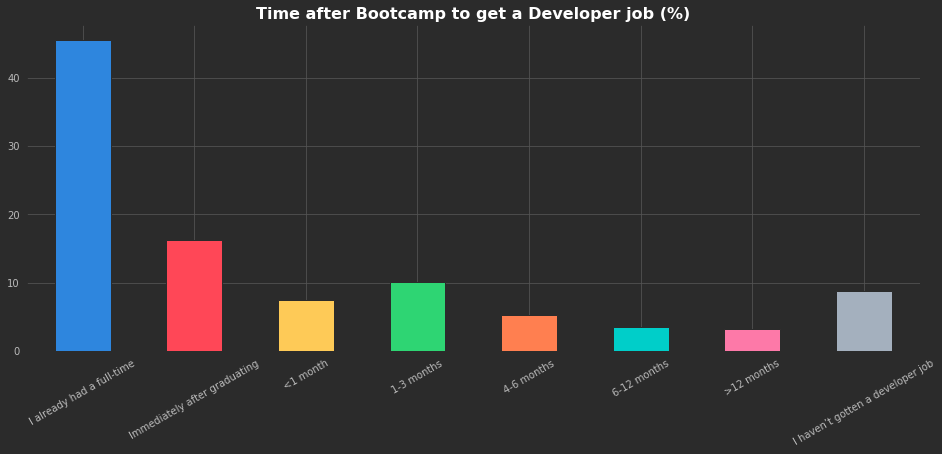

In [25]:
fig, ax = plt.subplots(figsize=(16, 6))

time_after_bootcamp[time_index].plot(kind="bar", ax=ax)
plt.xticks(np.arange(len(time_index)), time_index_short, rotation=30)
plt.title("Time after Bootcamp to get a Developer job (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Programming as a Hobby

In [26]:
hobby_bootcamp = df.loc[df['Took Bootcamp?'], 'Hobby'].value_counts() / df[df['Took Bootcamp?']].shape[0] * 100
hobby_no_bootcamp = df.loc[~(df['Took Bootcamp?']), 'Hobby'].value_counts() / df[~(df['Took Bootcamp?'])].shape[0] * 100

hobby_df = pd.concat([hobby_bootcamp, hobby_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
hobby_df

,Took Bootcamp,No took Bootcamp
Yes,81.408,80.778
No,18.592,19.222


Text(0.5,1,'Programming as a Hobby (%)')

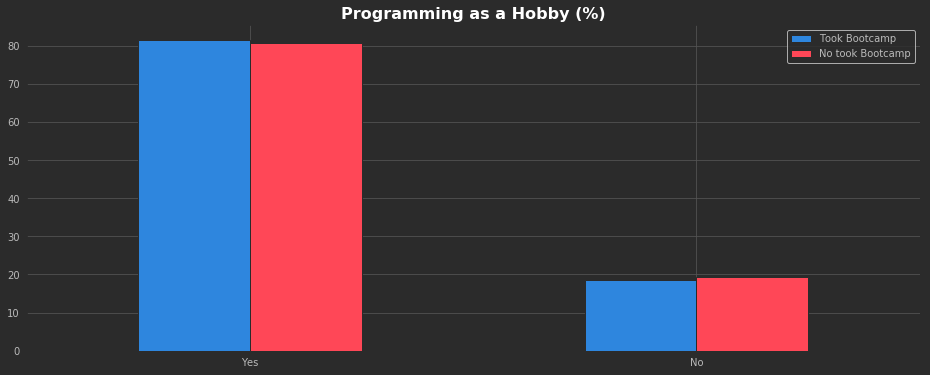

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))

hobby_df.plot(kind="bar", ax=ax)

plt.xticks(rotation=0)
plt.title("Programming as a Hobby (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Contributing to Open Source projects

In [28]:
os_bootcamp = df.loc[df['Took Bootcamp?'], 'OpenSource'].value_counts() / df[df['Took Bootcamp?']].shape[0] * 100
os_no_bootcamp = df.loc[~(df['Took Bootcamp?']), 'OpenSource'].value_counts() / df[~(df['Took Bootcamp?'])].shape[0] * 100

os_df = pd.concat([os_bootcamp, os_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1, sort=False)
os_df

,Took Bootcamp,No took Bootcamp
No,54.287,56.577
Yes,45.713,43.423


Text(0.5,1,'Contributing to Open Source projects (%)')

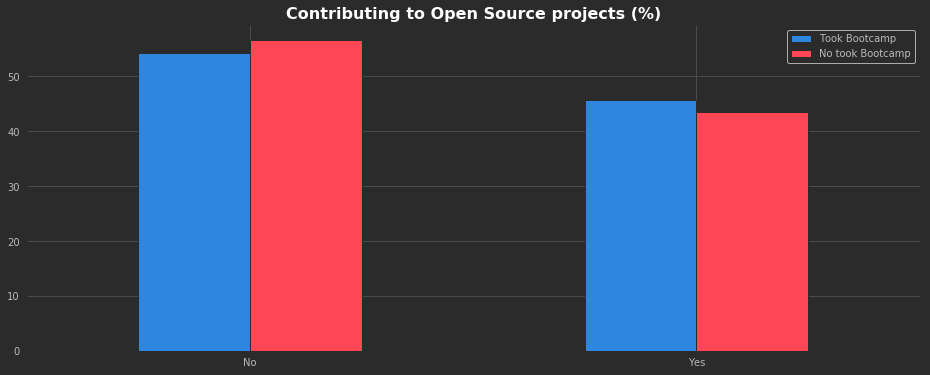

In [29]:
fig, ax = plt.subplots(figsize=(16, 6))

os_df.plot(kind="bar", ax=ax)

plt.xticks(rotation=0)
plt.title("Contributing to Open Source projects (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Employment analysis

We see here that **people that works full-time represent ~76% of Bootcamp assistants**.

In [30]:
employment_bootcamp = df.loc[df['Took Bootcamp?'], 'Employment'].value_counts() / df[df['Took Bootcamp?']].shape[0] * 100
employment_no_bootcamp = df.loc[~(df['Took Bootcamp?']), 'Employment'].value_counts() / df[~(df['Took Bootcamp?'])].shape[0] * 100

employment_df = pd.concat([employment_bootcamp, employment_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
employment_df

,Took Bootcamp,No took Bootcamp
Employed full-time,76.170,70.942
"Independent contractor, freelancer, or self-employed",9.904,9.350
"Not employed, but looking for work",6.970,5.789
Employed part-time,3.592,5.583
"Not employed, and not looking for work",2.032,4.343
Retired,0.343,0.221


Text(0.5,1,'Employment type (%)')

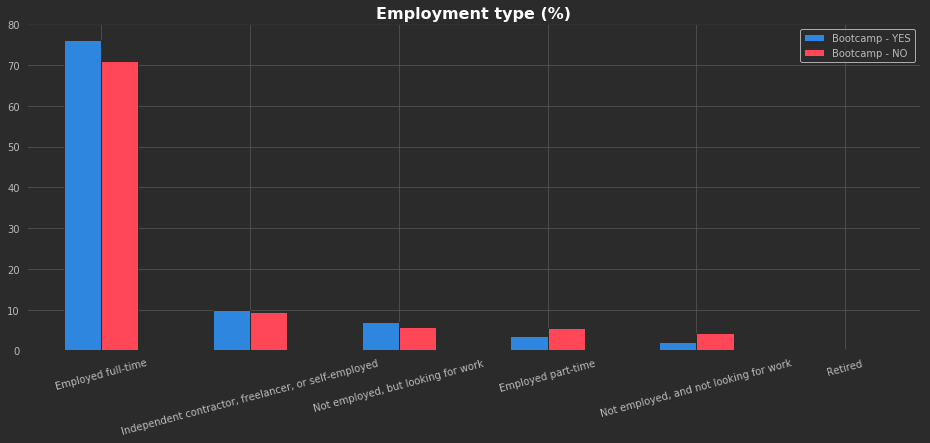

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))

employment_df.plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])
plt.xticks(rotation=15)
plt.title("Employment type (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Age distribution

We see that **people with >30 years old are more likely to attend to Bootcamps, as they are likely to get a new job or improve its career**.

In [32]:
age_short = ['Under 18 years old', '18 - 24 years old', '25 - 34 years old',
             '35 - 44 years old', '45 - 54 years old', '55 - 64 years old', '65 years or older']

age_bootcamp = df.loc[df['Took Bootcamp?'], 'Age'].dropna().value_counts()
age_no_bootcamp = df.loc[~(df['Took Bootcamp?']), 'Age'].dropna().value_counts()

age_df = pd.concat([age_bootcamp, age_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1, sort=False).loc[age_short]
age_df

,Took Bootcamp,No took Bootcamp
Under 18 years old,79,1559
18 - 24 years old,1272,13977
25 - 34 years old,2887,28872
35 - 44 years old,1239,10238
45 - 54 years old,488,2825
55 - 64 years old,176,783
65 years or older,44,135


Text(0.5,1,'Age distribution (count)')

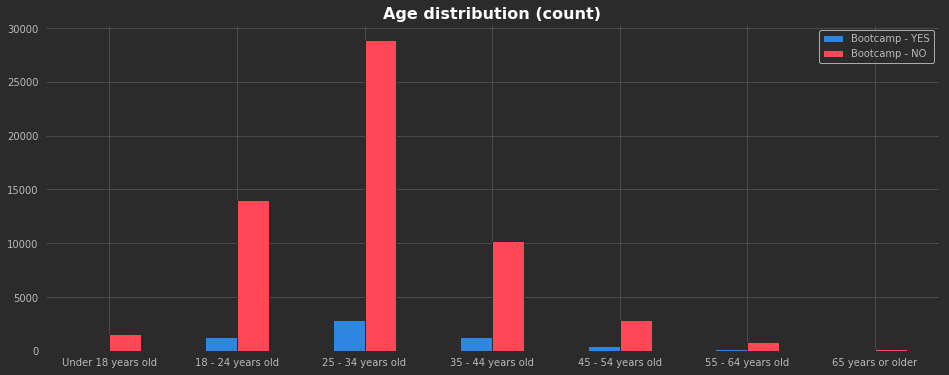

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))

age_df[['Took Bootcamp', 'No took Bootcamp']].plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])
plt.xticks(rotation=0)

plt.title("Age distribution (count)", fontsize=16, fontweight='bold', color='white')

In [34]:
age_short = ['Under 18 years old', '18 - 24 years old', '25 - 34 years old',
             '35 - 44 years old', '45 - 54 years old', '55 - 64 years old', '65 years or older']

age_bootcamp = df.loc[df['Took Bootcamp?'], 'Age'].dropna().value_counts() / df.loc[df['Took Bootcamp?'], 'Age'].dropna().shape[0] * 100
age_no_bootcamp = df.loc[~(df['Took Bootcamp?']), 'Age'].dropna().value_counts() / df.loc[~(df['Took Bootcamp?']), 'Age'].dropna().shape[0] * 100

age_df = pd.concat([age_bootcamp, age_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1, sort=False).loc[age_short]
age_df

,Took Bootcamp,No took Bootcamp
Under 18 years old,1.277,2.670
18 - 24 years old,20.566,23.938
25 - 34 years old,46.677,49.448
35 - 44 years old,20.032,17.534
45 - 54 years old,7.890,4.838
55 - 64 years old,2.846,1.341
65 years or older,0.711,0.231


Text(0.5,1,'Age distribution (%)')

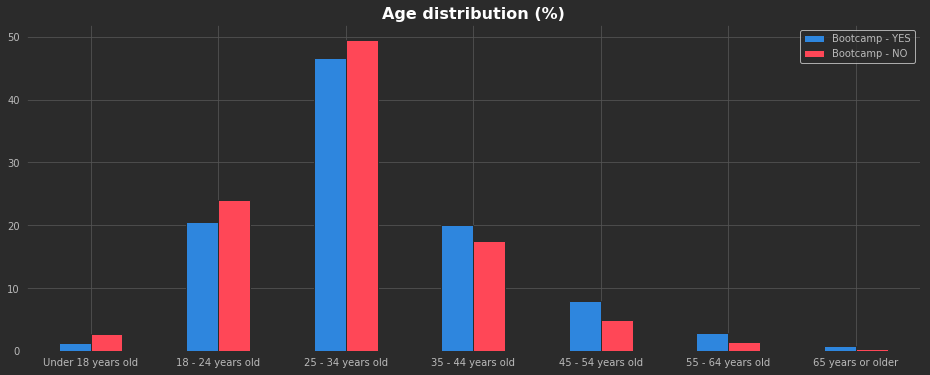

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))

age_df.plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])
plt.xticks(rotation=0)

plt.title("Age distribution (%)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Salary 

**Worldwide salary median is `$59,729` for people that attended to a Bootcamp**, and `$55075` for people that don't.

Text(0.5,1,'Salary distribution (US$/year)')

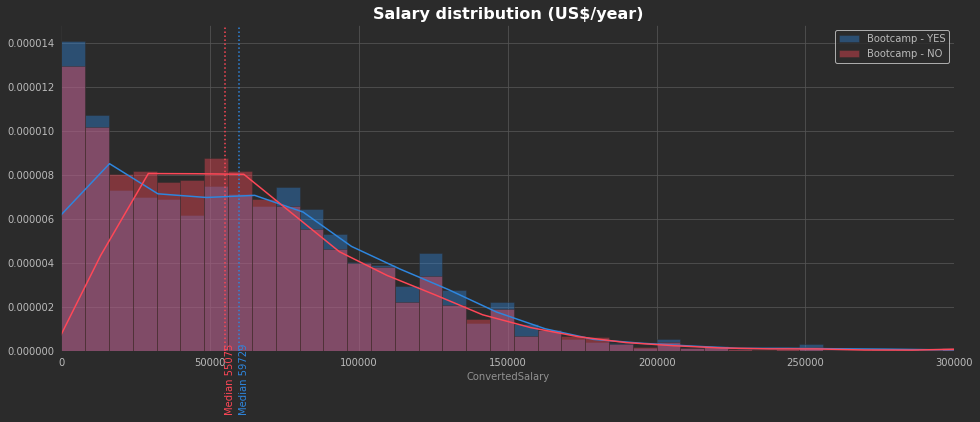

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, 300_000)

df_salaries = df.dropna(subset=['ConvertedSalary'])
salary_no_bootcamp = df_salaries.loc[~(df['Took Bootcamp?'])]['ConvertedSalary']
salary_bootcamp = df_salaries.loc[df['Took Bootcamp?']]['ConvertedSalary']

sns.distplot(salary_bootcamp.dropna(), bins=250, label='Took Bootcamp')
sns.distplot(salary_no_bootcamp.dropna(), bins=250, label='No took Bootcamp')
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])

ax.axvline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
ax.text(salary_bootcamp.median(), 0, 'Median {}'.format(int(salary_bootcamp.median())), rotation=90, color=flatui_palette[0])

ax.axvline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
ax.text(salary_no_bootcamp.median(), 0, 'Median {}'.format(int(salary_no_bootcamp.median())), rotation=90, color=flatui_palette[1])

ax.set_title("Salary distribution (US$/year)", fontsize=16, fontweight='bold', color='white')

In [37]:
pd.concat([salary_bootcamp.describe(), salary_no_bootcamp.describe()], axis=1)

,ConvertedSalary,ConvertedSalary
count,"4,615.000","43,087.000"
mean,"96,581.306","95,695.127"
std,"201,249.148","202,467.718"
min,0.000,0.000
25%,"22,818.000","24,000.000"
50%,"59,729.000","55,075.000"
75%,"97,729.000","92,000.000"
max,"2,000,000.000","2,000,000.000"


### Salary by country

We see that some big countries like United States, Germany, Canada and United Kingdom have higher salaries than the worldwide median salary.

In [38]:
respondents = df.groupby('Country')['Country'].count()

df_representative = df[df['Country'].isin(respondents[respondents > 80].index)]

In [39]:
selected_countries = ['United States', 'United Kingdom', 'Canada', 'Germany']

In [40]:
country_salary_bootcamp = df_representative.loc[df_representative['Took Bootcamp?']].groupby(['Country'])['ConvertedSalary'].median()[selected_countries]
country_salary_no_bootcamp = df_representative.loc[(~df_representative['Took Bootcamp?'])].groupby(['Country'])['ConvertedSalary'].median()[selected_countries]

country_salary_df = pd.concat([country_salary_bootcamp, country_salary_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
country_salary_df

,Took Bootcamp,No took Bootcamp
Country,,
United States,"98,000.000","100,000.000"
United Kingdom,"69,452.000","62,507.000"
Canada,"70,456.000","64,417.000"
Germany,"71,107.000","61,194.000"


Text(0.5,1,'Median Salary per Country (US$/year)')

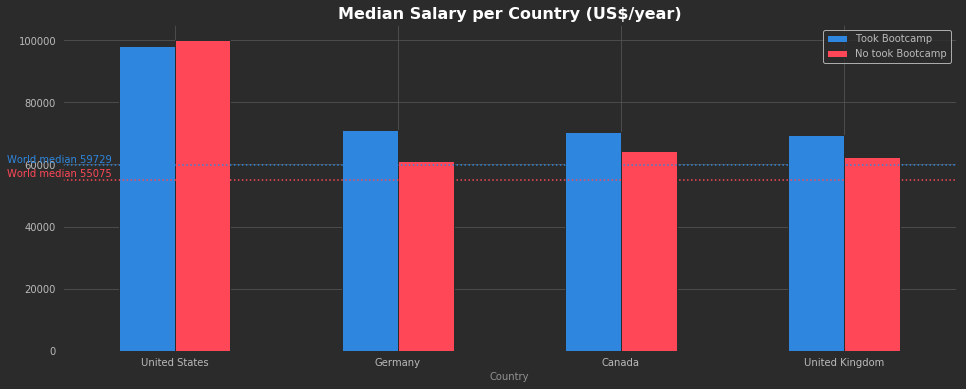

In [41]:
fig, ax = plt.subplots(figsize=(16, 6))

country_salary_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(-0.75, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(-0.75, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(rotation=0)
plt.title("Median Salary per Country (US$/year)", fontsize=16, fontweight='bold', color='white')

Text(0.5,1,'Salary Boxplot per Country (US$/year)')

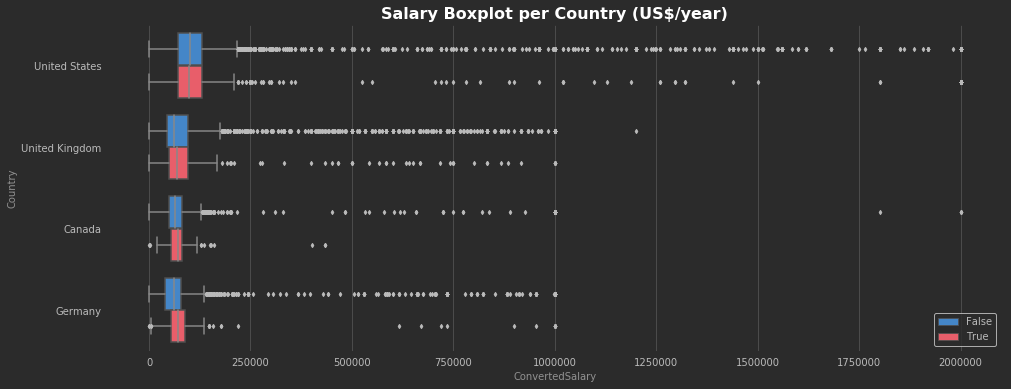

In [42]:
fig, ax = plt.subplots(figsize=(16, 6))

df_selected_countries = df_representative.loc[df_representative['Country'].isin(selected_countries), :]

ax = sns.boxplot(x='ConvertedSalary', y='Country', hue="Took Bootcamp?", data=df_selected_countries,
                 order=selected_countries, orient='h', fliersize=3, palette=flatui_palette)

for i, box in enumerate(ax.artists):    
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color('#888888')

    plt.setp(ax.lines[i*6+5], mfc='#bababa', mec='#bababa')

plt.legend()
plt.title("Salary Boxplot per Country (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Developer types

In [43]:
df['DevType'].str.split(';', expand=True).stack().unique()

array(['Full-stack developer', 'Database administrator',
       'DevOps specialist', 'System administrator', 'Engineering manager',
       'Data or business analyst',
       'Desktop or enterprise applications developer',
       'Game or graphics developer', 'QA or test developer', 'Student',
       'Back-end developer', 'Front-end developer', 'Designer',
       'C-suite executive (CEO, CTO, etc.)', 'Mobile developer',
       'Data scientist or machine learning specialist',
       'Marketing or sales professional', 'Product manager',
       'Embedded applications or devices developer',
       'Educator or academic researcher'], dtype=object)

In [44]:
selected_dev_types = ['Full-stack developer', 'Back-end developer', 'Front-end developer',
                      'Data scientist or machine learning specialist', 'Data or business analyst',
                      'DevOps specialist', 'System administrator',
                      'Database administrator', 'Mobile developer']

devtypes_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'DevType'].str.contains(devType).sum() for devType in selected_dev_types],
                              index=selected_dev_types,
                              name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

devtypes_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'DevType'].str.contains(devType).sum() for devType in selected_dev_types],
                              index=selected_dev_types,
                              name='No took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

devtypes_df = pd.concat([devtypes_bootcamp, devtypes_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
devtypes_df

,Took Bootcamp,No took Bootcamp
Full-stack developer,54.401,44.142
Back-end developer,58.738,53.551
Front-end developer,41.363,34.759
Data scientist or machine learning specialist,8.129,7.097
Data or business analyst,11.121,7.382
DevOps specialist,11.579,9.514
System administrator,10.863,10.467
Database administrator,15.600,13.199
Mobile developer,22.485,18.758


Text(0.5,1,'Developer types (%)')

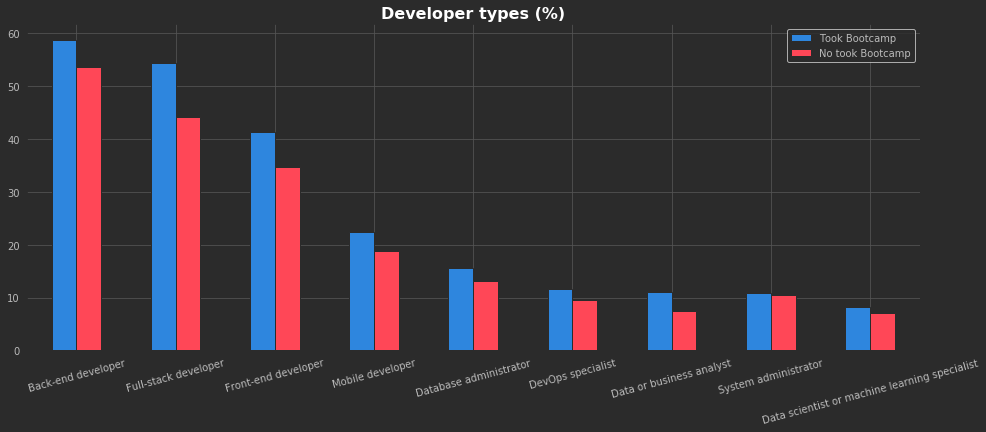

In [45]:
fig, ax = plt.subplots(figsize=(16, 6))

devtypes_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.xticks(rotation=15)
plt.title("Developer types (%)", fontsize=16, fontweight='bold', color='white')

In [47]:
devtype_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'DevType'].str.contains(devType) for devType in selected_dev_types])
salary_devtype_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][devtype_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_dev_types))],
                                       index=selected_dev_types,
                                       name='No took Bootcamp')

devtype_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'DevType'].str.contains(devType) for devType in selected_dev_types])
salary_devtype_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][devtype_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_dev_types))],
                                       index=selected_dev_types,
                                       name='No took Bootcamp')

salary_devtypes_df = pd.concat([salary_devtype_bootcamp, salary_devtype_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_devtypes_df

,Took Bootcamp,No took Bootcamp
Full-stack developer,"61,437.000","58,752.000"
Back-end developer,"58,598.000","55,075.000"
Front-end developer,"55,593.500","51,408.000"
Data scientist or machine learning specialist,"57,946.000","60,000.000"
Data or business analyst,"63,000.000","58,752.000"
DevOps specialist,"80,000.000","71,457.000"
System administrator,"60,000.000","55,562.000"
Database administrator,"53,076.000","51,000.000"
Mobile developer,"40,701.000","43,812.500"


Text(0.5,1,'Median Salary per Developer type (US$/year)')

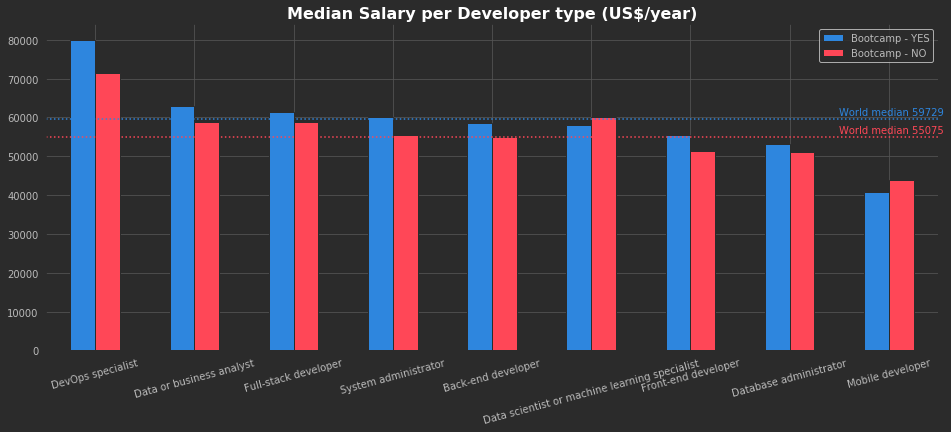

In [48]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_devtypes_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])

ax.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
ax.text(7.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

ax.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
ax.text(7.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

ax.tick_params(axis='x', rotation=15)
ax.set_title("Median Salary per Developer type (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Developer types in the US

In [49]:
usa_df = df.loc[df['Country'] == 'United States']

In [50]:
devtype_index_bootcamp = pd.Series([usa_df.loc[usa_df['Took Bootcamp?'], 'DevType'].str.contains(devType) for devType in selected_dev_types])

salary_devtype_bootcamp = pd.Series([usa_df.loc[usa_df['Took Bootcamp?']][devtype_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_dev_types))],
                                       index=selected_dev_types,
                                       name='No took Bootcamp')

devtype_index_no_bootcamp = pd.Series([usa_df.loc[~usa_df['Took Bootcamp?'], 'DevType'].str.contains(devType) for devType in selected_dev_types])
salary_devtype_no_bootcamp = pd.Series([usa_df.loc[~usa_df['Took Bootcamp?']][devtype_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_dev_types))],
                                       index=selected_dev_types,
                                       name='No took Bootcamp')

salary_devtypes_df = pd.concat([salary_devtype_bootcamp, salary_devtype_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_devtypes_df

,Took Bootcamp,No took Bootcamp
Full-stack developer,"97,500.000","100,000.000"
Back-end developer,"105,000.000","102,000.000"
Front-end developer,"90,000.000","95,000.000"
Data scientist or machine learning specialist,"105,000.000","102,000.000"
Data or business analyst,"100,000.000","88,500.000"
DevOps specialist,"115,000.000","110,000.000"
System administrator,"102,000.000","90,650.000"
Database administrator,"100,000.000","90,000.000"
Mobile developer,"100,000.000","101,380.000"


Text(0.5,1,'Median Salary in the US per Developer type (US$/year)')

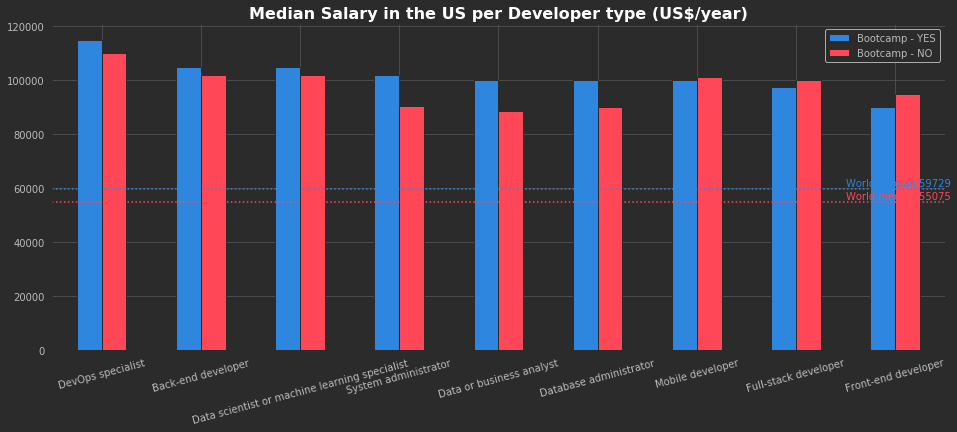

In [51]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_devtypes_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])

ax.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
ax.text(7.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

ax.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
ax.text(7.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

ax.tick_params(axis='x', rotation=15)
ax.set_title("Median Salary in the US per Developer type (US$/year)", fontsize=16, fontweight='bold', color='white')

In [52]:
round(df.loc[df['Took Bootcamp?'], 'LanguageWorkedWith'].str.split(';').fillna('').apply(len).mean(), 3)

6.295

In [53]:
round(df.loc[~df['Took Bootcamp?'], 'LanguageWorkedWith'].str.split(';').fillna('').apply(len).mean(), 3)

4.808

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Developer languages worked with

The most people work with a certain language, the most popular this language will be.

In [54]:
df['LanguageWorkedWith'].str.split(';', expand=True).stack().unique()

array(['JavaScript', 'Python', 'HTML', 'CSS', 'Bash/Shell', 'C#', 'SQL',
       'TypeScript', 'C', 'C++', 'Java', 'Matlab', 'R', 'Assembly',
       'CoffeeScript', 'Erlang', 'Go', 'Lua', 'Ruby', 'PHP', 'VB.NET',
       'Swift', 'Groovy', 'Kotlin', 'Objective-C', 'Scala', 'F#',
       'Haskell', 'Rust', 'Julia', 'VBA', 'Perl', 'Cobol',
       'Visual Basic 6', 'Delphi/Object Pascal', 'Hack', 'Clojure',
       'Ocaml'], dtype=object)

In [55]:
selected_languages = ['Python', 'R', 'Matlab', 'JavaScript', 'TypeScript', 'HTML',
                      'Bash/Shell', 'SQL', 'Swift', 'Go', 'Java', 'Ruby', 'PHP',
                      'Objective-C', 'Scala', 'Rust']

languages_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'LanguageWorkedWith'].str.contains(language).sum() for language in selected_languages],
                              index=selected_languages,
                              name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

languages_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'LanguageWorkedWith'].str.contains(language).sum() for language in selected_languages],
                              index=selected_languages,
                              name='No took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

languages_df = pd.concat([languages_bootcamp, languages_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
languages_df

,Took Bootcamp,No took Bootcamp
Python,33.476,30.500
R,18.420,13.129
Matlab,5.768,4.529
JavaScript,71.461,54.092
TypeScript,19.150,13.376
HTML,71.003,52.975
Bash/Shell,39.116,30.956
SQL,60.341,44.035
Swift,8.387,6.231
Go,6.083,5.559


Text(0.5,1,'Developer languages worked with (%)')

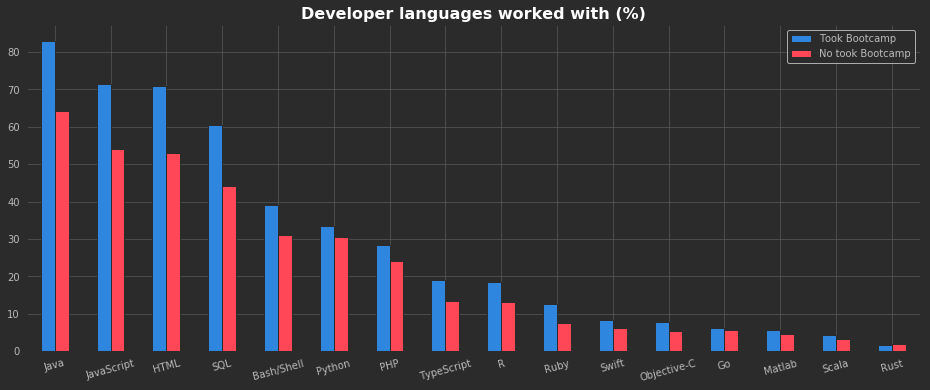

In [56]:
fig, ax = plt.subplots(figsize=(16, 6))

languages_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.xticks(rotation=15)
plt.title("Developer languages worked with (%)", fontsize=16, fontweight='bold', color='white')

In [57]:
language_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'LanguageWorkedWith'].str.contains(language) for language in selected_languages])
salary_language_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][language_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_languages))],
                                       index=selected_languages,
                                       name='No took Bootcamp')

language_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'LanguageWorkedWith'].str.contains(language) for language in selected_languages])
salary_language_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][language_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_languages))],
                                       index=selected_languages,
                                       name='No took Bootcamp')

salary_languages_df = pd.concat([salary_language_bootcamp, salary_language_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_languages_df

,Took Bootcamp,No took Bootcamp
Python,"60,000.000","60,000.000"
R,"70,000.000","68,443.000"
Matlab,"40,000.000","42,836.000"
JavaScript,"60,000.000","55,812.000"
TypeScript,"64,417.000","62,001.000"
HTML,"58,381.000","54,361.000"
Bash/Shell,"69,761.000","64,314.000"
SQL,"60,084.000","56,000.000"
Swift,"60,000.000","59,729.000"
Go,"75,000.000","75,850.000"


Text(0.5,1,'Median Salary per Developer language (US$/year)')

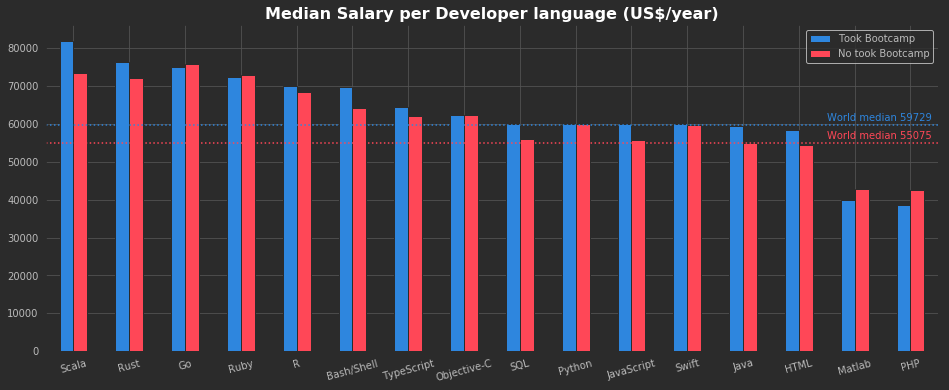

In [58]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_languages_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(13.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(13.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(rotation=15)
plt.title("Median Salary per Developer language (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Programming Frameworks worked with

The most people work with a certain programming framework, the most popular this framework will be.

In [59]:
df['FrameworkWorkedWith'].str.split(';', expand=True).stack().unique()

array(['Django', 'React', 'Angular', 'Node.js', 'Hadoop', 'Spark',
       'Spring', '.NET Core', 'Cordova', 'Xamarin', 'TensorFlow',
       'Torch/PyTorch'], dtype=object)

In [60]:
selected_frameworks = ['Django', 'React', 'Angular', 'Node.js',
                      'Spark', 'Spring', 'TensorFlow', 'Torch/PyTorch']

frameworks_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'FrameworkWorkedWith'].str.contains(framework).sum() for framework in selected_frameworks],
                              index=selected_frameworks,
                              name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

frameworks_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'FrameworkWorkedWith'].str.contains(framework).sum() for framework in selected_frameworks],
                              index=selected_frameworks,
                              name='No took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

frameworks_df = pd.concat([frameworks_bootcamp, frameworks_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
frameworks_df

,Took Bootcamp,No took Bootcamp
Django,9.060,6.629
React,21.955,13.936
Angular,29.913,18.432
Node.js,37.055,25.046
Spark,3.821,2.403
Spring,14.727,8.763
TensorFlow,4.981,4.004
Torch/PyTorch,1.302,0.846


Text(0.5,1,'Programming Frameworks worked with (%)')

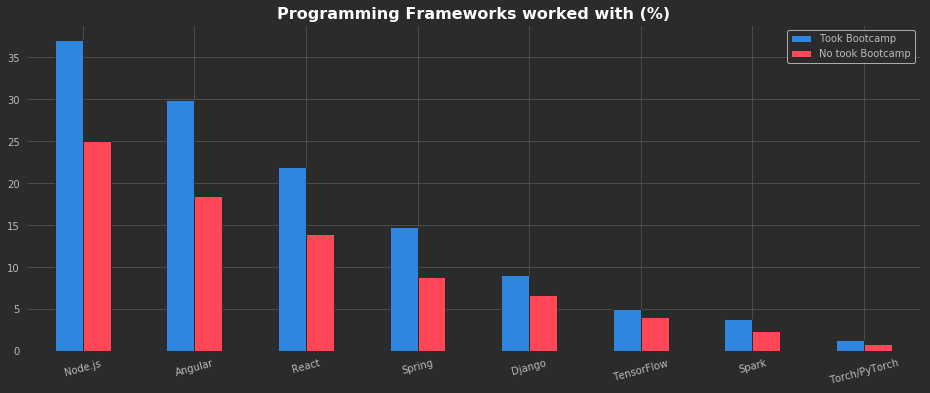

In [61]:
fig, ax = plt.subplots(figsize=(16, 6))

frameworks_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.xticks(rotation=15)
plt.title("Programming Frameworks worked with (%)", fontsize=16, fontweight='bold', color='white')

In [62]:
framework_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'FrameworkWorkedWith'].str.contains(framework) for framework in selected_frameworks])
salary_framework_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][framework_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_frameworks))],
                                       index=selected_frameworks,
                                       name='No took Bootcamp')

framework_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'FrameworkWorkedWith'].str.contains(framework) for framework in selected_frameworks])
salary_framework_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][framework_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_frameworks))],
                                       index=selected_frameworks,
                                       name='No took Bootcamp')

salary_frameworks_df = pd.concat([salary_framework_bootcamp, salary_framework_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_frameworks_df

,Took Bootcamp,No took Bootcamp
Django,"50,000.000","52,692.000"
React,"67,313.000","64,417.000"
Angular,"60,000.000","55,075.000"
Node.js,"63,000.000","59,629.500"
Spark,"84,000.000","73,433.000"
Spring,"55,562.000","55,562.000"
TensorFlow,"59,940.000","60,607.000"
Torch/PyTorch,"40,977.000","54,507.000"


Text(0.5,1,'Median Salary per programming Framework (US$/year)')

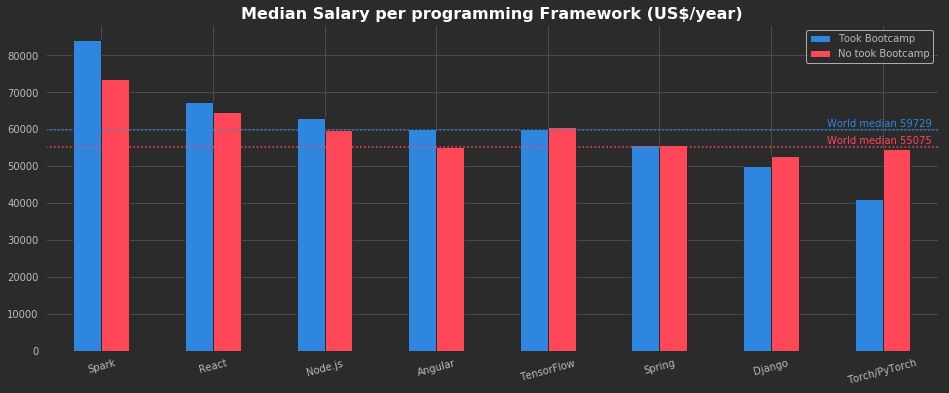

In [63]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_frameworks_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(6.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(6.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(rotation=15)
plt.title("Median Salary per programming Framework (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Platforms worked with

The most people work with a certain platform, the most popular this platform will be.

In [64]:
df['PlatformWorkedWith'].str.split(';', expand=True).stack().unique()

array(['AWS', 'Azure', 'Linux', 'Firebase', 'Arduino',
       'Windows Desktop or Server', 'Heroku', 'Amazon Echo', 'iOS',
       'Mac OS', 'Serverless', 'Android', 'WordPress', 'Drupal',
       'Google Cloud Platform/App Engine', 'Raspberry Pi', 'SharePoint',
       'IBM Cloud or Watson', 'Mainframe', 'Apple Watch or Apple TV',
       'ESP8266', 'Gaming console', 'Predix', 'Windows Phone',
       'Salesforce', 'Google Home'], dtype=object)

In [65]:
selected_platforms = ['AWS', 'Azure', 'Linux', 'Firebase', 'Raspberry Pi',
                      'Heroku', 'iOS', 'Serverless', 'Android', 'WordPress',
                      'Google Cloud Platform/App Engine', 'IBM Cloud or Watson']

platforms_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'PlatformWorkedWith'].str.contains(platform).sum() for platform in selected_platforms],
                              index=selected_platforms,
                              name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

platforms_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'PlatformWorkedWith'].str.contains(platform).sum() for platform in selected_platforms],
                              index=selected_platforms,
                              name='No took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

platforms_df = pd.concat([platforms_bootcamp, platforms_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
platforms_df

,Took Bootcamp,No took Bootcamp
AWS,21.483,15.703
Azure,11.994,6.998
Linux,36.253,31.922
Firebase,15.758,9.224
Raspberry Pi,13.353,10.424
Heroku,12.495,6.575
iOS,14.412,10.008
Serverless,4.809,2.886
Android,25.776,18.892
WordPress,15.901,10.205


Text(0.5,1,'Platforms worked with (%)')

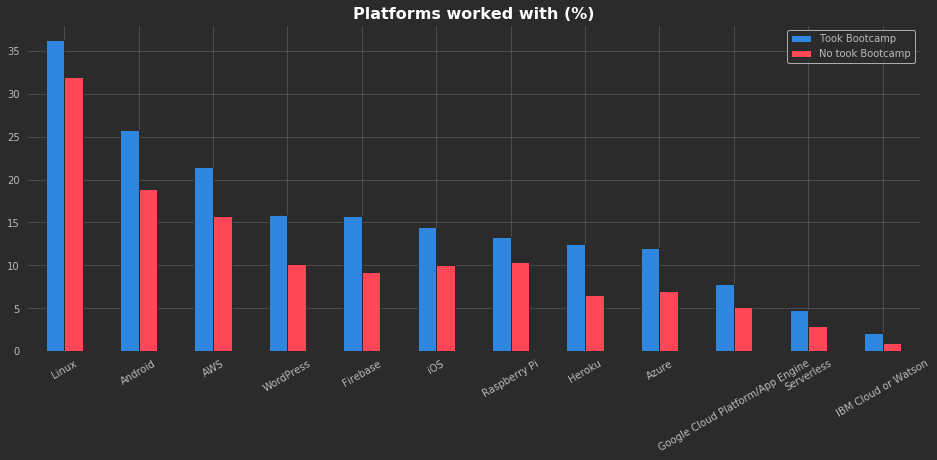

In [66]:
fig, ax = plt.subplots(figsize=(16, 6))

platforms_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.xticks(rotation=30)
plt.title("Platforms worked with (%)", fontsize=16, fontweight='bold', color='white')

In [67]:
platform_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'PlatformWorkedWith'].str.contains(platform) for platform in selected_platforms])
salary_platform_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][platform_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_platforms))],
                                       index=selected_platforms,
                                       name='No took Bootcamp')

platform_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'PlatformWorkedWith'].str.contains(platform) for platform in selected_platforms])
salary_platform_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][platform_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_platforms))],
                                       index=selected_platforms,
                                       name='No took Bootcamp')

salary_platforms_df = pd.concat([salary_platform_bootcamp, salary_platform_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_platforms_df

,Took Bootcamp,No took Bootcamp
AWS,"73,084.000","71,561.500"
Azure,"74,086.000","70,000.000"
Linux,"58,752.000","56,365.000"
Firebase,"37,000.000","38,199.000"
Raspberry Pi,"66,552.000","60,000.000"
Heroku,"60,000.000","55,000.000"
iOS,"62,600.000","58,752.000"
Serverless,"83,000.000","84,692.000"
Android,"39,273.000","42,267.000"
WordPress,"40,261.000","42,836.000"


Text(0.5,1,'Median Salary per Platform (US$/year)')

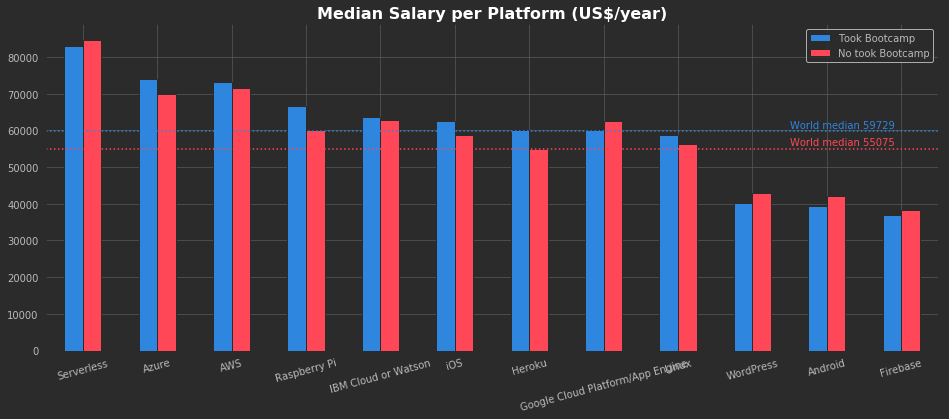

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_platforms_df.sort_values(by='Took Bootcamp', ascending=False).plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(9.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(9.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(rotation=15)
plt.title("Median Salary per Platform (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Technologies

**Bootcamp students tend to overestimate what they know/use**.

In [69]:
cols = ['DevType', 'LanguageWorkedWith', 'FrameworkWorkedWith', 'PlatformWorkedWith']

comparison_df = pd.DataFrame()

for c in cols:
    comparison_df[c] = pd.Series([
        round(df.loc[df['Took Bootcamp?'], c].str.split(';').fillna('').apply(len).mean(), 3),
        round(df.loc[~df['Took Bootcamp?'], c].str.split(';').fillna('').apply(len).mean(), 3)
    ])
    
comparison_df = comparison_df.T
comparison_df.columns = ['Took Bootcamp', 'No took Bootcamp']
comparison_df.index = ['Developer type', 'Languages worked with', 'Frameworks worked with', 'Platforms worked with']
comparison_df

,Took Bootcamp,No took Bootcamp
Developer type,3.262,2.757
Languages worked with,6.295,4.808
Frameworks worked with,1.602,1.040
Platforms worked with,2.668,1.837


Text(0.5,1,'Average technologies')

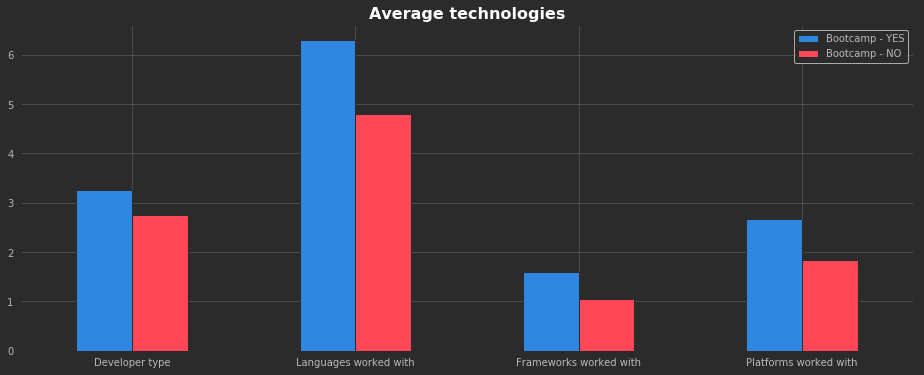

In [70]:
fig, ax = plt.subplots(figsize=(16, 6))

comparison_df.plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])

plt.xticks(rotation=0)
plt.title("Average technologies", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Respondents by formal Education

In [71]:
df['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

In [72]:
# fill NA values
df['FormalEducation'].fillna('I never completed any formal education', inplace=True)

education_short = ['No formal education completed', 'Primary/elementary school', 'Secondary school',
                   'College/university with no degree', 'Associate degree', 'Bachelor’s degree',
                   'Master’s degree', 'Professional degree', 'Doctoral degree']

# convert to short string values
df['FormalEducation'].replace({
    'I never completed any formal education': 'No formal education completed',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Some college/university study without earning a degree': 'College/university with no degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
    'Professional degree (JD, MD, etc.)': 'Progressional degree',
    'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree'
}, inplace=True)

selected_education = list(df['FormalEducation'].unique())
selected_education

['Bachelor’s degree',
 'Associate degree',
 'College/university with no degree',
 'Master’s degree',
 'Secondary school',
 'No formal education completed',
 'Primary/elementary school',
 'Progressional degree',
 'Doctoral degree']

In [73]:
education_bootcamp = pd.Series(df.loc[df['Took Bootcamp?']].groupby('FormalEducation')['FormalEducation'].count(),
                              index=selected_education,
                              name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

education_no_bootcamp = pd.Series(df.loc[~df['Took Bootcamp?']].groupby('FormalEducation')['FormalEducation'].count(),
                              index=selected_education,
                              name='Took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

education_df = pd.concat([education_bootcamp, education_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
education_df

,Took Bootcamp,No took Bootcamp
Bachelor’s degree,48.132,43.863
Associate degree,3.263,2.985
College/university with no degree,12.852,11.769
Master’s degree,22.470,21.581
Secondary school,6.226,9.270
No formal education completed,2.748,5.072
Primary/elementary school,1.116,1.718
Progressional degree,1.345,1.473
Doctoral degree,1.846,2.270


Text(0.5,1,'Respondents by formal Education (%)')

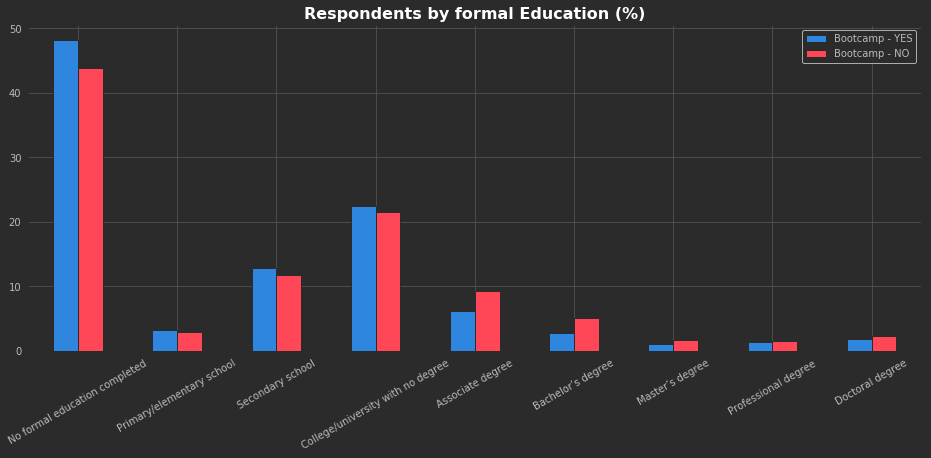

In [74]:
fig, ax = plt.subplots(figsize=(16, 6))

education_df.plot(kind="bar", ax=ax)
ax.legend(["Bootcamp - YES", "Bootcamp - NO"])
plt.xticks(np.arange(len(education_short)), education_short, rotation=30)

plt.title("Respondents by formal Education (%)", fontsize=16, fontweight='bold', color='white')

In [75]:
education_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'FormalEducation'].str.contains(platform) for platform in selected_education])
salary_education_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][education_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_education))],
                                       index=selected_education,
                                       name='No took Bootcamp')

education_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'FormalEducation'].str.contains(platform) for platform in selected_education])
salary_education_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][education_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_education))],
                                       index=selected_education,
                                       name='No took Bootcamp')

salary_education_df = pd.concat([salary_education_bootcamp, salary_education_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_education_df

,Took Bootcamp,No took Bootcamp
Bachelor’s degree,"60,000.000","58,525.000"
Associate degree,"61,437.000","53,000.000"
College/university with no degree,"55,075.000","49,560.000"
Master’s degree,"65,000.000","58,800.000"
Secondary school,"36,716.000","29,000.000"
No formal education completed,"36,358.000","38,208.000"
Primary/elementary school,"23,920.000","11,124.000"
Progressional degree,"36,106.000","31,834.500"
Doctoral degree,"75,636.000","79,552.000"


Text(0.5,1,'Median Salary by formal Education (US$/year)')

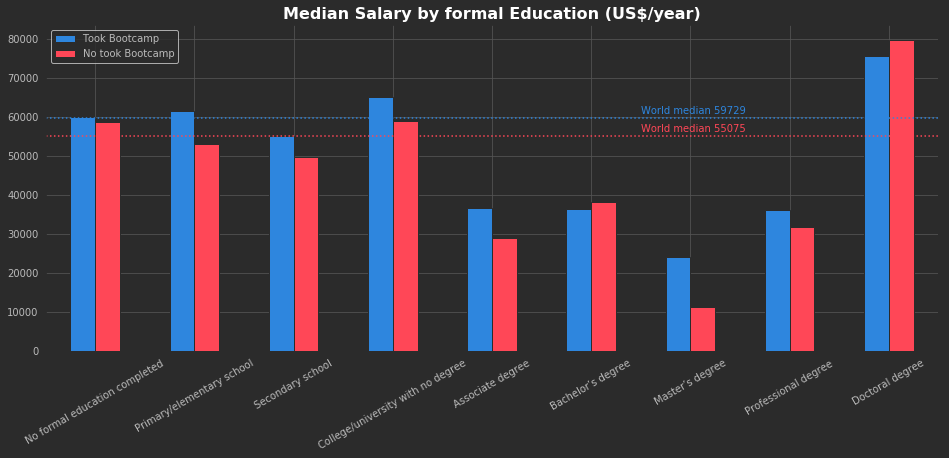

In [76]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_education_df.plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(5.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(5.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(np.arange(len(education_short)), education_short, rotation=30)
plt.title("Median Salary by formal Education (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Respondents by Company size



In [77]:
df['CompanySize'].unique()

array(['20 to 99 employees', '10,000 or more employees',
       '100 to 499 employees', '10 to 19 employees',
       '500 to 999 employees', '1,000 to 4,999 employees',
       '5,000 to 9,999 employees', 'Fewer than 10 employees', nan],
      dtype=object)

In [78]:
# drop NA values
df['CompanySize'].dropna(inplace=True)

company_short = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees',
                 '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees',
                 '5,000 to 9,999 employees', '10,000 or more employees']

selected_company = list(df['CompanySize'].unique())
selected_company

['20 to 99 employees',
 '10,000 or more employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '500 to 999 employees',
 '1,000 to 4,999 employees',
 '5,000 to 9,999 employees',
 'Fewer than 10 employees']

In [79]:
company_bootcamp = pd.Series(df.loc[df['Took Bootcamp?']].groupby('CompanySize')['CompanySize'].count(),
                             index=selected_company,
                             name='Took Bootcamp') / df[df['Took Bootcamp?']].shape[0] * 100

company_no_bootcamp = pd.Series(df.loc[~df['Took Bootcamp?']].groupby('CompanySize')['CompanySize'].count(),
                                index=selected_company,
                                name='Took Bootcamp') / df[~df['Took Bootcamp?']].shape[0] * 100

company_df = pd.concat([company_bootcamp, company_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
company_df

,Took Bootcamp,No took Bootcamp
20 to 99 employees,16.760,17.226
"10,000 or more employees",13.067,9.627
100 to 499 employees,15.729,14.055
10 to 19 employees,7.442,8.150
500 to 999 employees,5.596,4.614
"1,000 to 4,999 employees",8.974,7.627
"5,000 to 9,999 employees",3.492,3.018
Fewer than 10 employees,6.770,7.626


Text(0.5,1,'Respondents by Company size (%)')

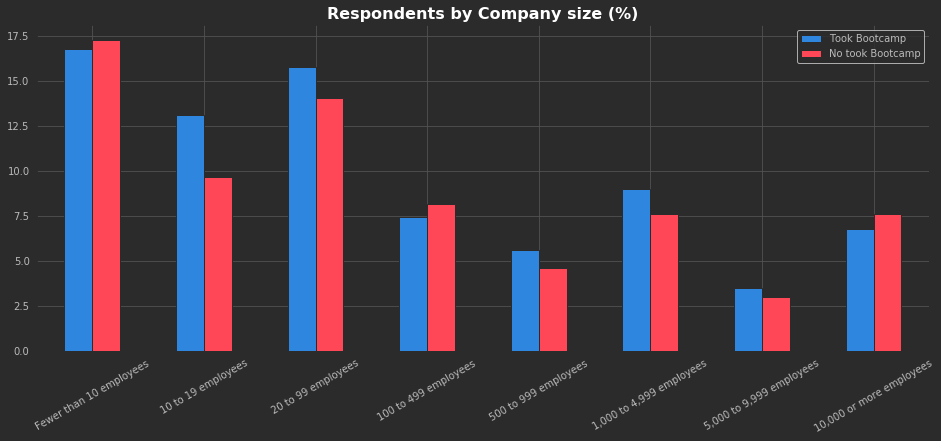

In [80]:
fig, ax = plt.subplots(figsize=(16, 6))

company_df.plot(kind="bar", ax=ax)

plt.xticks(np.arange(len(company_short)), company_short, rotation=30)

plt.title("Respondents by Company size (%)", fontsize=16, fontweight='bold', color='white')

In [81]:
company_index_bootcamp = pd.Series([df.loc[df['Took Bootcamp?'], 'CompanySize'].str.contains(company) for company in selected_company])
salary_company_bootcamp = pd.Series([df.loc[df['Took Bootcamp?']][education_index_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_company))],
                                       index=selected_company,
                                       name='No took Bootcamp')

company_index_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?'], 'CompanySize'].str.contains(company) for company in selected_company])
salary_company_no_bootcamp = pd.Series([df.loc[~df['Took Bootcamp?']][education_index_no_bootcamp[i].fillna(False)]['ConvertedSalary'].median() for i in np.arange(len(selected_company))],
                                       index=selected_company,
                                       name='No took Bootcamp')

salary_company_df = pd.concat([salary_company_bootcamp, salary_company_no_bootcamp], keys=['Took Bootcamp', 'No took Bootcamp'], axis=1)
salary_company_df

,Took Bootcamp,No took Bootcamp
20 to 99 employees,"60,000.000","58,525.000"
"10,000 or more employees","61,437.000","53,000.000"
100 to 499 employees,"55,075.000","49,560.000"
10 to 19 employees,"65,000.000","58,800.000"
500 to 999 employees,"36,716.000","29,000.000"
"1,000 to 4,999 employees","36,358.000","38,208.000"
"5,000 to 9,999 employees","23,920.000","11,124.000"
Fewer than 10 employees,"36,106.000","31,834.500"


Text(0.5,1,'Median Salary by Company size (US$/year)')

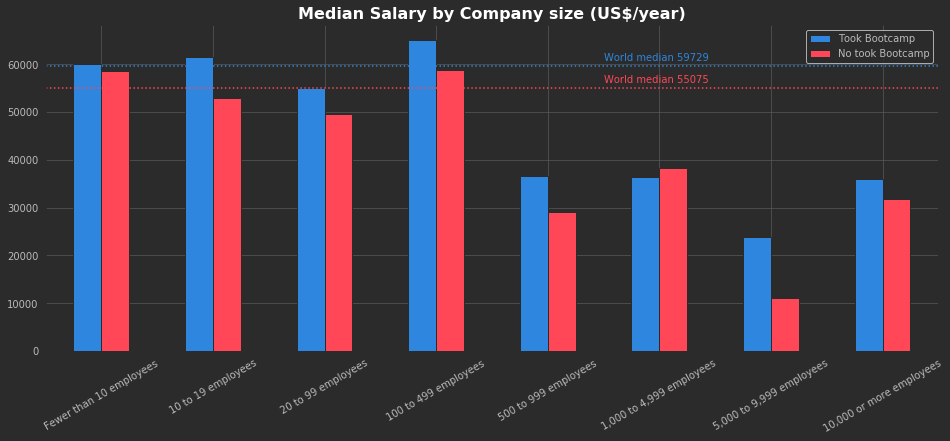

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))

salary_company_df.plot(kind="bar", ax=ax)

plt.axhline(salary_bootcamp.median(), linestyle=':', color=flatui_palette[0])
plt.text(4.5, salary_bootcamp.median()+1000, 'World median {}'.format(int(salary_bootcamp.median())), color=flatui_palette[0])

plt.axhline(salary_no_bootcamp.median(), linestyle=':', color=flatui_palette[1])
plt.text(4.5, salary_no_bootcamp.median()+1000, 'World median {}'.format(int(salary_no_bootcamp.median())), color=flatui_palette[1])

plt.xticks(np.arange(len(company_short)), company_short, rotation=30)
plt.title("Median Salary by Company size (US$/year)", fontsize=16, fontweight='bold', color='white')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Wrapping up!

Finally we want to create a more visual comparison between respondents that _"Took Bootcamp"_ and respondents that _"No took Bootcamp"_.

To do that we compare five key-features:
    - Programming as a hobby
    - Employed full-time
    - Contribute to Open Source
    - More 35 years old
    - Median salary (K US$/year)

In [83]:
programming_as_hobby = list(hobby_df.loc[:'Yes'].iloc[0])

In [84]:
contribute_os = list(os_df.loc[:'Yes'].iloc[0])

In [85]:
works_fulltime = list(employment_df.loc['Employed full-time'])

In [86]:
older_35 = list(age_df[3:].sum())

In [87]:
median_salary = [salary_bootcamp.median()/1_000, salary_no_bootcamp.median()/1_000]

In [88]:
df_spider = pd.DataFrame({
    'group': ['Bootcamp - YES', 'Bootcamp - NO'],
    'Programming as a hobby': programming_as_hobby,
    'Employed full-time': works_fulltime,
    'Contribute to Open Source': contribute_os,
    'More 35 years old': older_35,
    'Median salary (K US$/year)': median_salary
})

df_spider

,group,Programming as a hobby,Employed full-time,Contribute to Open Source,More 35 years old,Median salary (K US$/year)
0,Bootcamp - YES,81.408,76.170,54.287,31.479,59.729
1,Bootcamp - NO,80.778,70.942,56.577,23.945,55.075


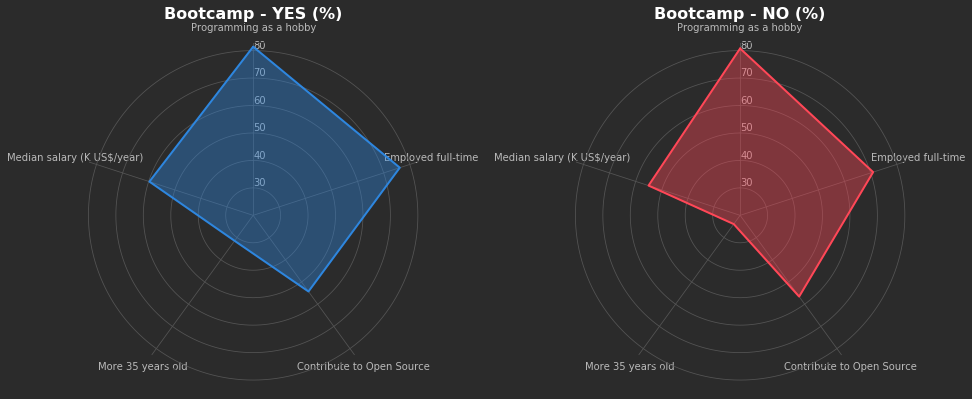

In [89]:
from math import pi
  
def make_spider(df, row):
    categories=list(df)[1:]
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(2, 2, row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
#    plt.yticks([10,20,30], [10, 20, 30])
    plt.ylim(20,83)

    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, color=flatui_palette[row], linestyle='solid')
    ax.fill(angles, values, color=flatui_palette[row], alpha=0.4)

    plt.title(df['group'][row] + ' (%)', fontsize=16, fontweight='bold', color='white')
    
fig, ax = plt.subplots(figsize=(16, 14))

for row in range(0, len(df_spider.index)):
    make_spider(df=df_spider, row=row)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)